# uSEIR LL- fit with different minimize methods 

Use a different fitting engine, compare them

Date:  27 May 2020
Author:   J.A. Hernando

In [1]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Wed May 27 17:12:09 2020


In [2]:
import numpy as np
import pandas as pd
import matplotlib

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [4]:
## mathplotlib configuration
plt.style.context('seaborn-colorblind');

In [5]:
import scipy.stats  as stats

from scipy.integrate import odeint
import scipy.integrate as spi
from scipy.interpolate import interp1d

In [6]:
import c19.useir            as us
import c19.useir_ana        as usa
import c19.kfmysir          as kf
import c19.cfit             as cfit

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import iminuit             as im

In [9]:
## Testing iminuit

## uSEIR

### generation

In [10]:
Beta, TR, TI, N, PhiM = 3./5., 5., 5.5, 1e6, 0.1
R0  = Beta * TR
print('R0, TR, TI ', R0, TR, TI)

R0, TR, TI  3.0 5.0 5.5


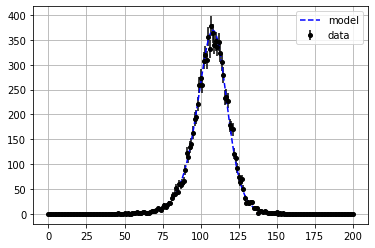

In [13]:
ufun = us._useir
pars = (R0, TR)
mask = (True, True)
times, xdata = us.rvs(pars, ufun = ufun)
xs, ys = xdata

usa.plot_fit_data(xdata, pars, ufun = ufun)

### test different engine minimize

CG
mle: warning
true (3.0, 5.0) , guess  [3. 5.] , best  [2.93534366 4.72547714]
f best  72924.87751247174 , f true  72928.1332083443 , f delta  3.2556958725617733
Minuit
true (3.0, 5.0) , guess  [3. 5.] , best  [2.93528404 4.7252075 ]
f best  72924.87751255033 , f true  72928.1332083443 , f delta  3.255695793966879
Nelder-Mead
true (3.0, 5.0) , guess  [3. 5.] , best  [2.93526929 4.72512629]
f best  72924.87751192675 , f true  72928.1332083443 , f delta  3.2556964175455505
BFGS
mle: warning
true (3.0, 5.0) , guess  [3. 5.] , best  [2.93523996 4.72498526]
f best  72924.87751205445 , f true  72928.1332083443 , f delta  3.2556962898524944
Powell
true (3.0, 5.0) , guess  [3. 5.] , best  [2.99382621 4.99957081]
f best  72925.26942314586 , f true  72928.1332083443 , f delta  2.8637851984385634


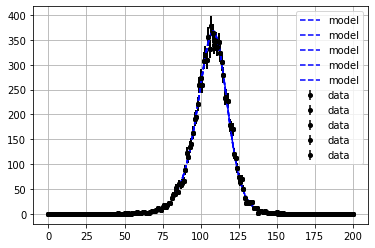

In [14]:
fmle   = us.mll(xdata, ufun = ufun)
xpars  = usa.fit_setpars(pars, (R0, TR), mask)
methods = ['CG', 'Minuit', 'Nelder-Mead', 'BFGS', 'Powell']
for method in methods:
    parshat = usa.fit_ana(fmle, xpars, pars, mask, method = method)
    usa.plot_fit_data(xdata, parshat, ufun = ufun)

move now the initial parameters

CG
true (3.0, 5.0) , guess  [2. 7.] , best  [ 37.54302677 -20.45434759]
f best  0.0 , f true  72928.1332083443 , f delta  72928.1332083443
Nelder-Mead
true (3.0, 5.0) , guess  [2. 7.] , best  [2.93528451 4.72519699]
f best  72924.87751192153 , f true  72928.1332083443 , f delta  3.255696422769688
BFGS
true (3.0, 5.0) , guess  [2. 7.] , best  [ 4.43022524 -3.74075721]
f best  0.0 , f true  72928.1332083443 , f delta  72928.1332083443
Powell
true (3.0, 5.0) , guess  [2. 7.] , best  [3.45850582 7.00853982]
f best  72949.21054697309 , f true  72928.1332083443 , f delta  -21.07733862879104
Minuit
true (3.0, 5.0) , guess  [2. 7.] , best  [2.93539888 4.72574218]
f best  72924.87751378941 , f true  72928.1332083443 , f delta  3.2556945548858494


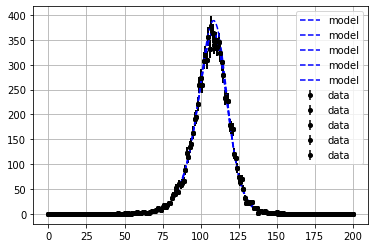

In [15]:
fmle   = us.mll(xdata, ufun = ufun)
xpars  = usa.fit_setpars(pars, (R0 - 1, TR + 2), mask)
methods = ['CG', 'Nelder-Mead', 'BFGS', 'Powell', 'Minuit']
for method in methods:
    parshat = usa.fit_ana(fmle, xpars, pars, mask, method = method)
    usa.plot_fit_data(xdata, parshat, ufun = ufun)

CG
mle: warning
true (3.0, 5.0) , guess  [4. 7.] , best  [3.5268147  7.14583011]
f best  73005.24922947012 , f true  72928.1332083443 , f delta  -77.11602112582477
Nelder-Mead
true (3.0, 5.0) , guess  [4. 7.] , best  [2.93528858 4.72521434]
f best  72924.87751193874 , f true  72928.1332083443 , f delta  3.2556964055547724
BFGS
true (3.0, 5.0) , guess  [4. 7.] , best  [ -33.73115294 -111.74698964]
f best  0.0 , f true  72928.1332083443 , f delta  72928.1332083443
Powell
true (3.0, 5.0) , guess  [4. 7.] , best  [3.4549447 6.9906516]
f best  72948.88650202556 , f true  72928.1332083443 , f delta  -20.75329368126404
Minuit
true (3.0, 5.0) , guess  [4. 7.] , best  [2.9352503  4.72502179]
f best  72924.87751254952 , f true  72928.1332083443 , f delta  3.2556957947817864


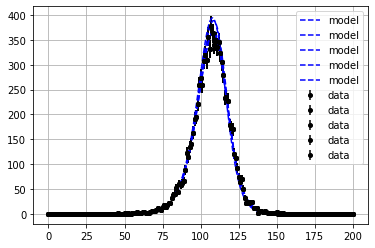

In [16]:
fmle   = us.mll(xdata, ufun = ufun)
xpars  = usa.fit_setpars(pars, (R0 + 1, TR + 2), mask)
methods = ['CG', 'Nelder-Mead', 'BFGS', 'Powell', 'Minuit']
for method in methods:
    parshat = usa.fit_ana(fmle, xpars, pars, mask, method = method)
    usa.plot_fit_data(xdata, parshat, ufun = ufun)

## Conclusions

- The different methods by default works with the true parameters as initial guess 

- Minuit and Nelder-Meas show similar results

- Powell, CG and BFGS give problems when the initial guess is not the true. Maybe some parameters need to be tuned.